In [8]:
import pandas as pd
import numpy as np 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
!pip install flaml

In [5]:
crop_data = pd.read_csv(r'C:\Users\satya\Downloads\Crop_recommendation.csv')
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

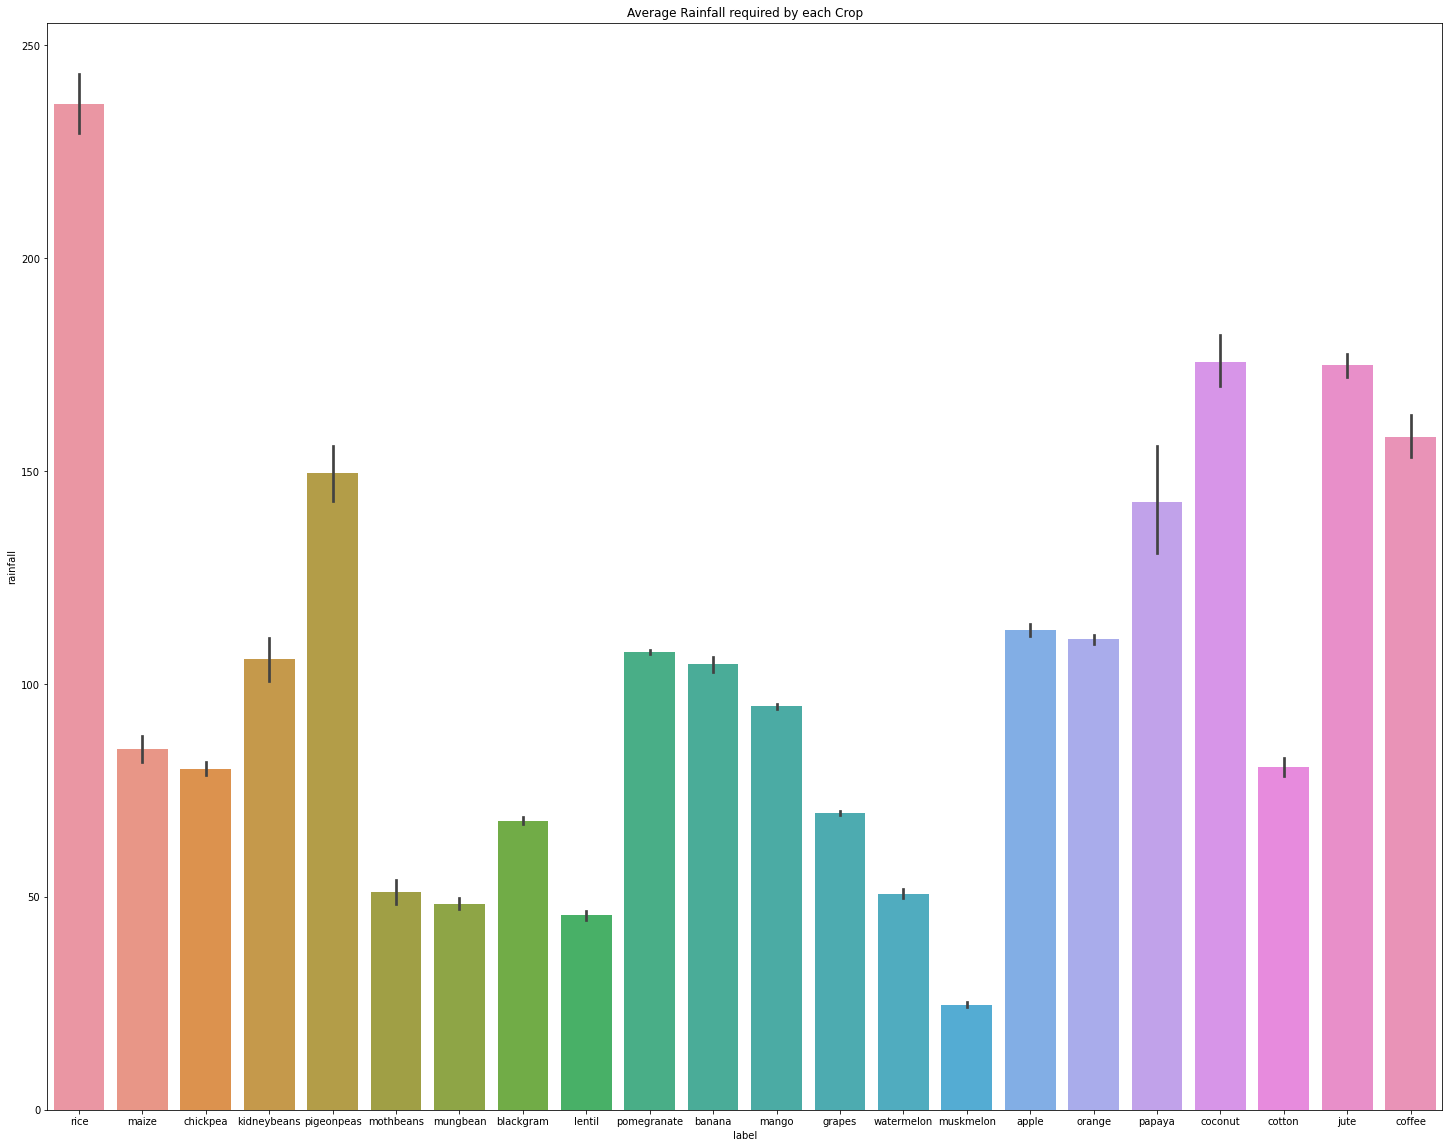

In [18]:
plt.figure(figsize=(25,20))
plt.title('Average Rainfall required by each Crop')
sns.barplot(data = crop_data, x='label',y='rainfall')
plt.show()

As seen above , rice requires the higesht amount of rainfall whereas muskmelon has the lowest requirement.

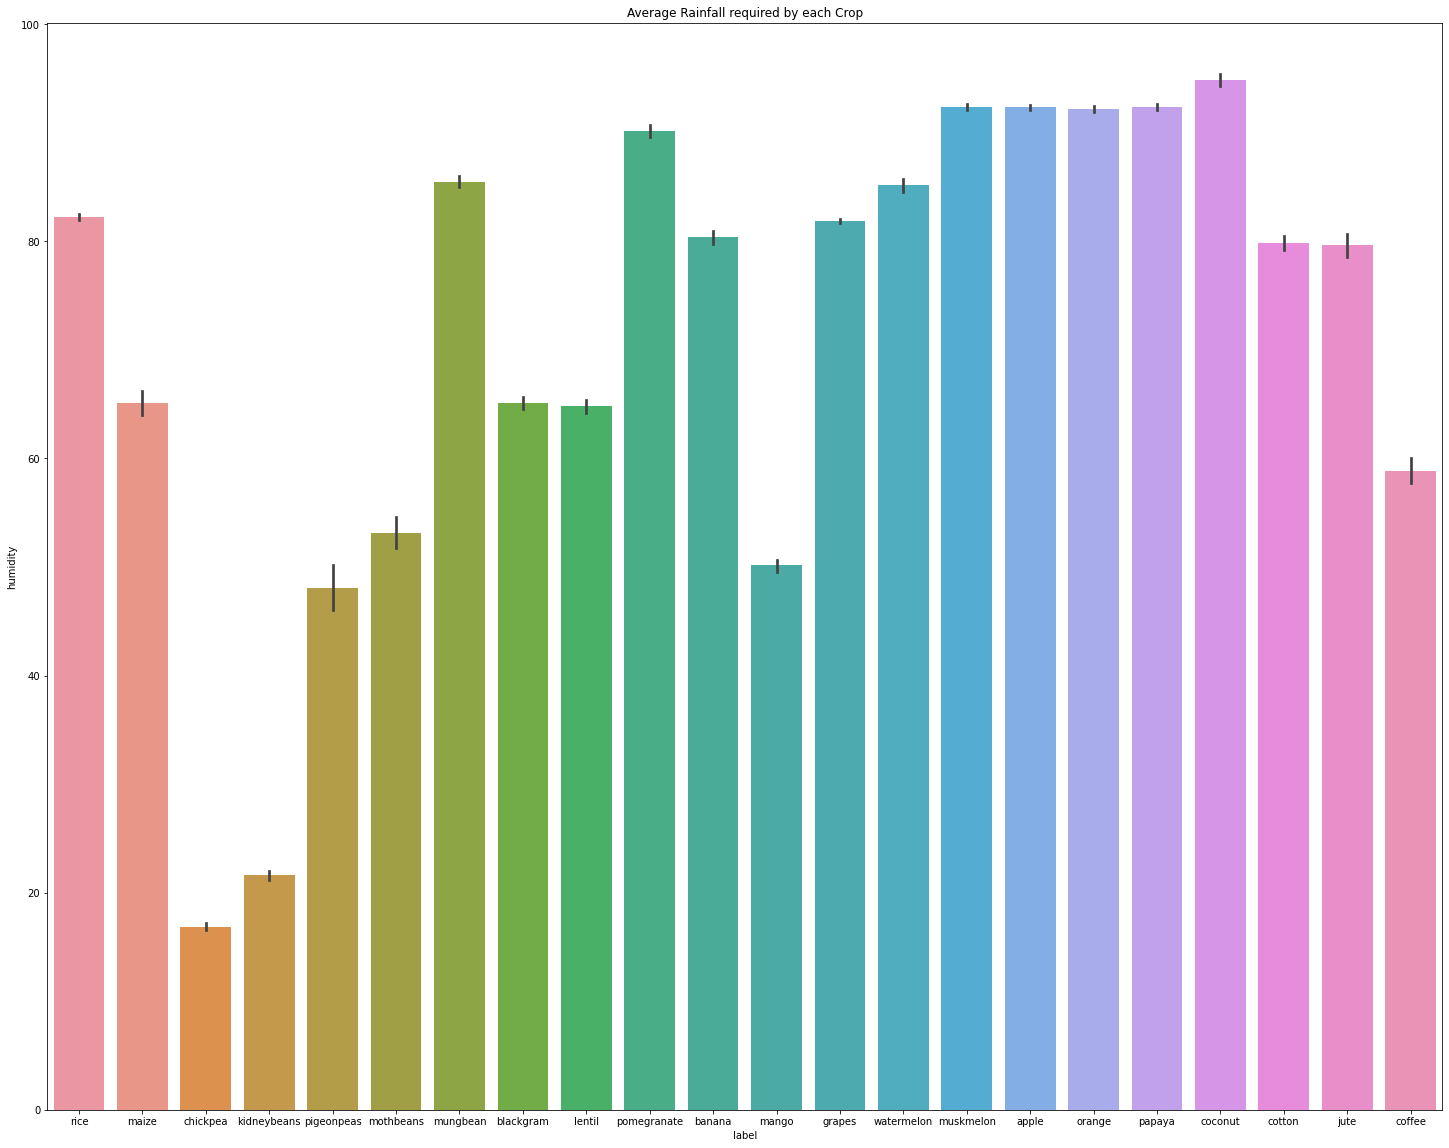

In [20]:
plt.figure(figsize=(25,20))
plt.title('Average Rainfall required by each Crop')
sns.barplot(data = crop_data, x='label',y='humidity')
plt.show()

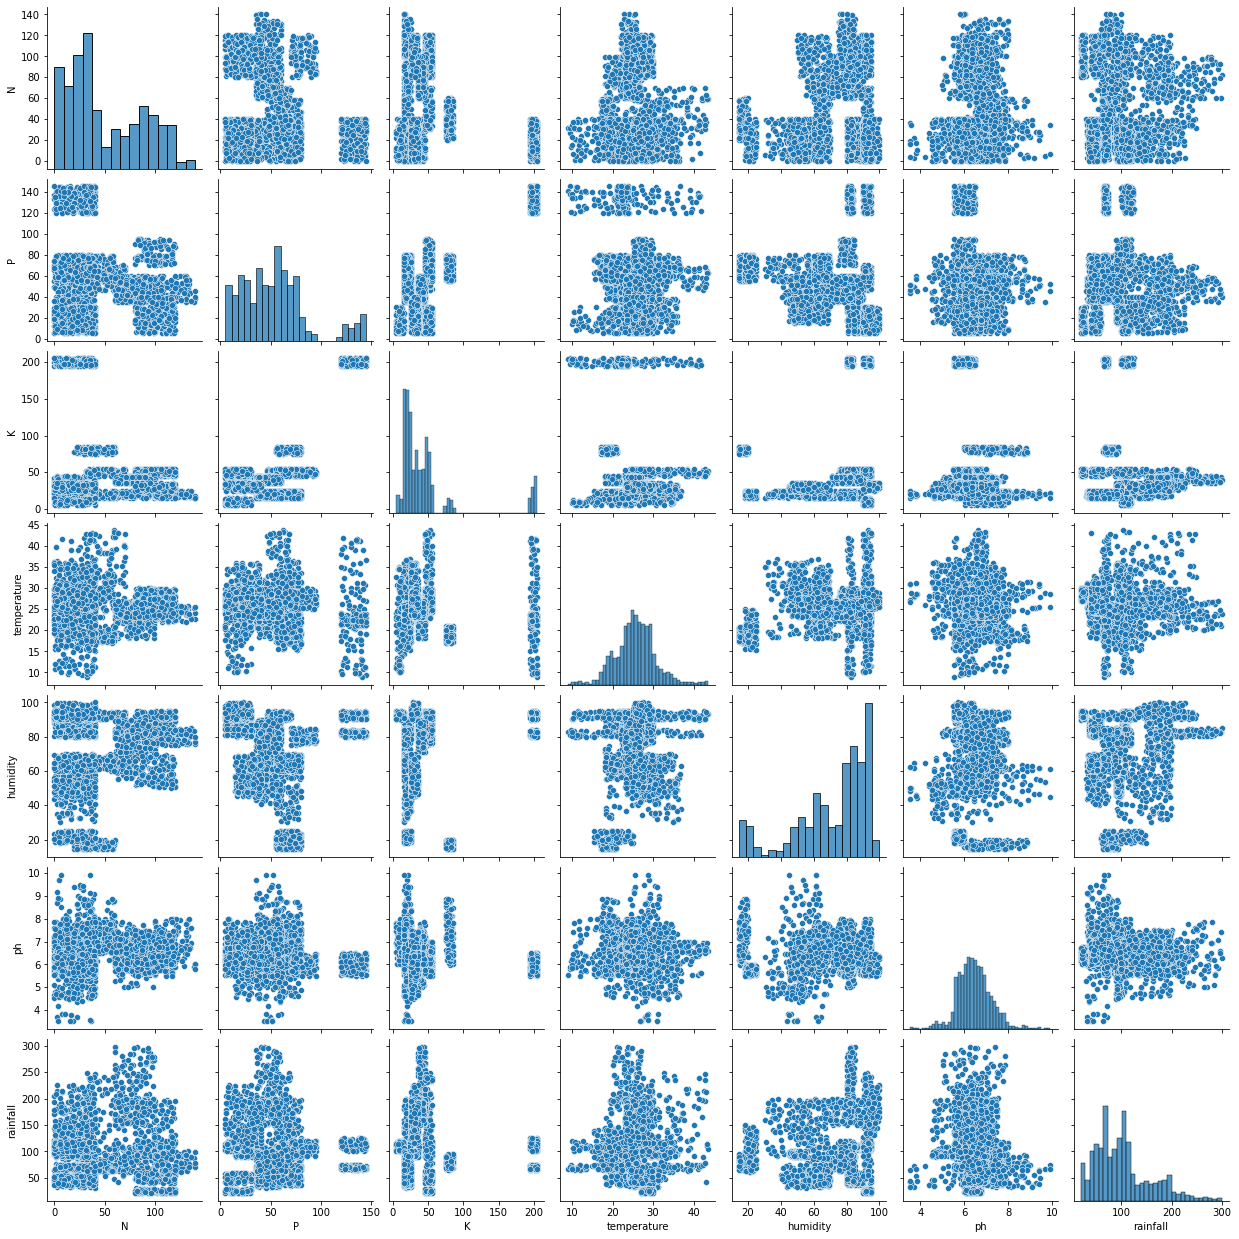

In [21]:
sns.pairplot(crop_data)

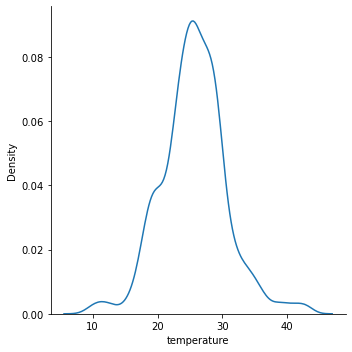

In [24]:
sns.displot(crop_data,x='temperature',kind='kde')

temperature follows almost a normal distribution 


<AxesSubplot:>

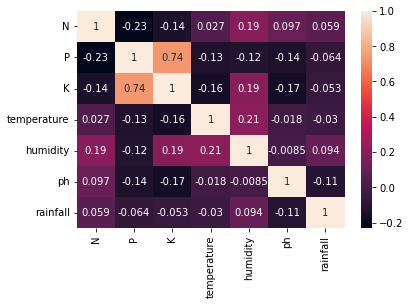

In [25]:
corr = crop_data.corr()
sns.heatmap(corr,annot=True)

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
crop_data['label'] = label_encoder.fit_transform(crop_data['label'])
x = crop_data.drop(columns=['label'],axis=1)
y = crop_data['label']
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

In [40]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
mms = MinMaxScaler()
x_train_scaled = mms.fit_transform(x_train)
x_test_scaled= mms.fit_transform(x_test)

In [41]:
from flaml import AutoML
automl = AutoML()
automl_settings = {
    "time_budget": 20,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "Crops.log",
}
automl.fit(x_train_scaled,y_train,automl_settings)

[flaml.automl: 10-01 21:14:21] {2600} INFO - task = classification
[flaml.automl: 10-01 21:14:21] {2602} INFO - Data split method: stratified
[flaml.automl: 10-01 21:14:21] {2605} INFO - Evaluation method: holdout
[flaml.automl: 10-01 21:14:21] {2727} INFO - Minimizing error metric: log_loss
[flaml.automl: 10-01 21:14:21] {2777} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl: 10-01 21:14:21] {161} WARNING - Starting points outside of the search space are removed. Remaining starting points: []
[flaml.automl: 10-01 21:14:21] {161} WARNING - Starting points outside of the search space are removed. Remaining starting points: []
[flaml.automl: 10-01 21:14:21] {161} WARNING - Starting points outside of the search space are removed. Remaining starting points: []
[flaml.automl: 10-01 21:14:21] {2869} INFO - List of ML le

In [42]:
automl.predict(x_test_scaled)

array([12, 10,  5, 19,  2,  7,  2, 16, 21, 11, 13,  4, 17,  7, 13, 20, 10,
       11, 18,  1, 18,  6, 10, 18, 17,  2, 15, 15,  5, 10,  8,  2, 13, 18,
       20,  2, 17,  2, 19,  3, 11,  0, 17,  3,  2,  8,  3, 12, 16, 20, 14,
       10, 15, 19, 19, 15, 18, 13,  3, 10, 17,  0, 14, 20,  3,  5, 17,  3,
        5, 14,  6,  9,  9, 12, 21, 14, 10,  8, 17,  8, 19,  4, 10, 12, 19,
       17,  0,  7,  9, 21,  7, 11,  3,  5,  6,  3, 12, 11, 15,  4, 21,  1,
        5,  6,  1, 14, 14,  3,  4,  8, 16, 14,  1, 16, 21, 18, 17, 13, 14,
        1,  8, 13,  0, 19, 16,  6, 20, 14, 11,  7,  0, 16, 13, 20, 15,  6,
       12,  8,  8,  1,  5,  5,  9,  6, 18,  2,  1,  7, 13,  5, 16,  6, 20,
        9, 17,  4, 18,  7,  1, 14,  0, 11,  8,  0, 16, 13,  5, 17, 20,  0,
        0,  8, 15, 10, 12, 21,  4,  6, 13,  1,  4, 20, 18,  2, 14, 19, 13,
       15,  6, 13,  9,  8, 14, 16, 16,  1, 17, 17, 12,  4,  3,  3, 13,  8,
       16,  3,  3,  0, 18,  3, 19,  0,  9,  0,  9, 20, 18, 16,  4,  3, 18,
       13, 15,  3,  9, 17

In [46]:
predictions = automl.predict(x_test_scaled)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        21
           8       0.86      0.95      0.90        19
           9       1.00      0.88      0.94        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        22
          17       0.96    

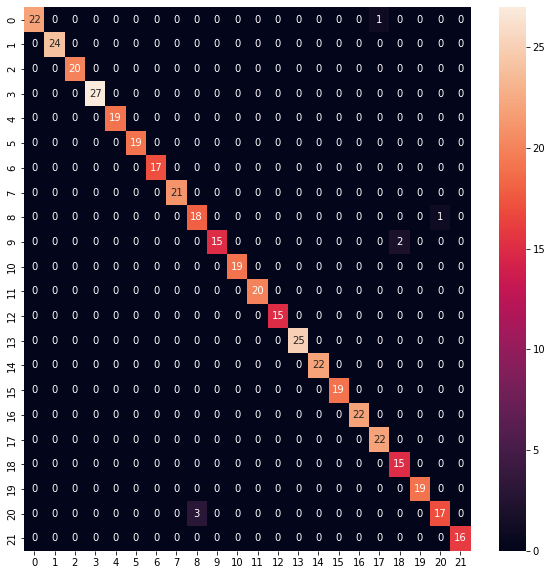

In [50]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)
plt.show()

In [52]:
automl.model.estimator

LGBMClassifier(learning_rate=0.2422782244991656, max_bin=127,
               min_child_samples=52, n_estimators=573, num_leaves=16,
               reg_alpha=0.03433194930183514, reg_lambda=0.03870494540146326,
               verbose=-1)

In [54]:
!pip install lightgbm

In [55]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate=0.2422782244991656, max_bin=127,
               min_child_samples=52, n_estimators=573, num_leaves=16,
               reg_alpha=0.03433194930183514, reg_lambda=0.03870494540146326,
               verbose=-1)

lgbm.fit(x_train_scaled, y_train)


LGBMClassifier(learning_rate=0.2422782244991656, max_bin=127,
               min_child_samples=52, n_estimators=573, num_leaves=16,
               reg_alpha=0.03433194930183514, reg_lambda=0.03870494540146326,
               verbose=-1)

In [57]:
!pip install joblib

In [63]:
import joblib
joblib.dump(lgbm, 'lgb.pkl')

['lgb.pkl']